In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
data = data.dropna()

<AxesSubplot:xlabel='target', ylabel='count'>

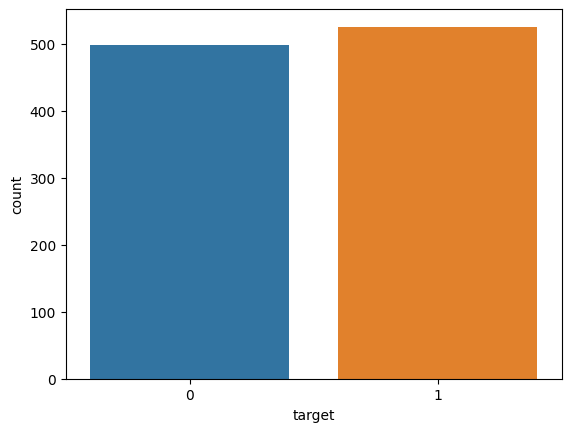

In [6]:
sns.countplot(x=data['target'])

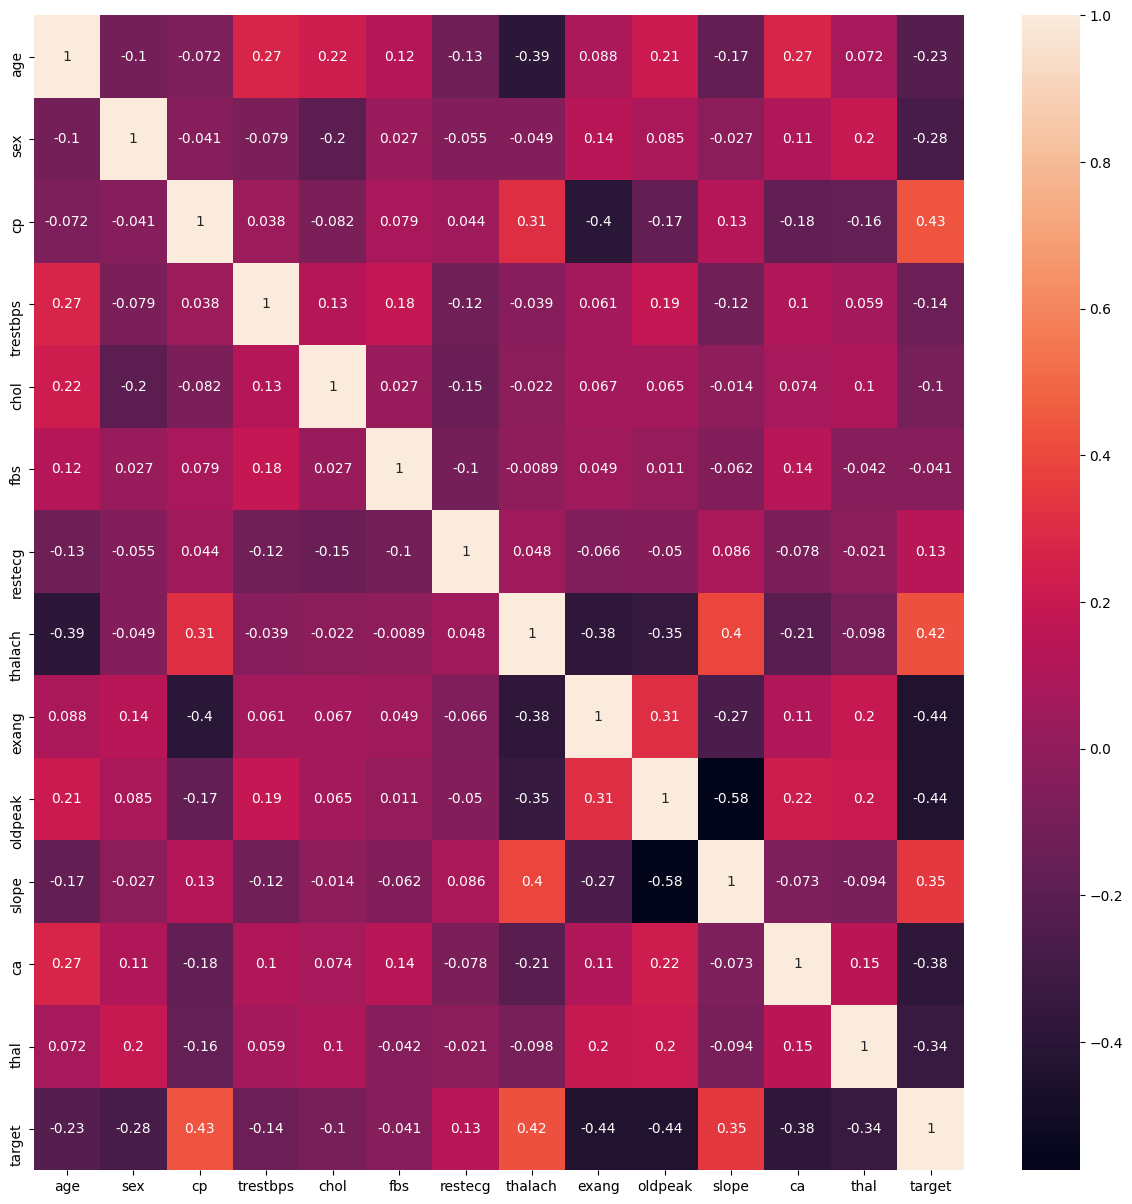

In [7]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [8]:
X = data.drop(["target"],axis =1)
y = data["target"]

In [9]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
rfecv = RFECV(cv=11, estimator=RandomForestClassifier(random_state=0),
      scoring='accuracy')

In [10]:
rfecv.fit(X,y)

RFECV(cv=11, estimator=RandomForestClassifier(random_state=0),
      scoring='accuracy')

In [11]:
#to get number of the features
display('Number of features:', rfecv.n_features_)

#to get feature names
list(X.columns[rfecv.support_])

'Number of features:'

8

['age', 'cp', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'thal']

In [12]:
X_fe = data[['age', 'cp', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'thal']]

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 8)

x_pca = pca.fit_transform(X_fe)

In [14]:
x_pca.shape


(1025, 8)

Text(0, 0.5, 'Second Principal Component')

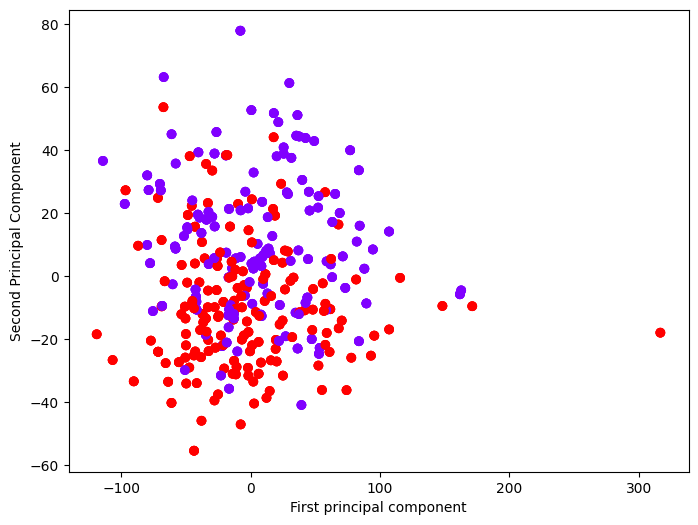

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=data['target'],cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [16]:
df = data[['age', 'cp', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'thal','target']]
df.to_csv('processed.csv')

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((820, 8), (820,), (205, 8), (205,))

In [18]:
ML_Model = []
accuracy = []
f1score = []
recall = []
precision = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    f1score.append(round(b, 3))
    recall.append(round(c, 3))
    precision.append(round(d, 3))

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [20]:
ML_Model1 = []
mean = []

#function to call for storing the results
def storeResults1(model, a):
    ML_Model1.append(model)
    mean.append(round(a, 3))

In [21]:
from sklearn.svm import SVC

# instantiate the model 
svm = SVC(C=1.0,kernel = 'rbf', degree = 3, gamma = 'scale', probability=True, tol = 0.001,cache_size=200,max_iter=-1,random_state=0)

# fit the model 
svm.fit(X_train, y_train)

#predicting the target value from the model for the samples

y_pred = svm.predict(X_test)

svc_acc = accuracy_score(y_pred, y_test)
svc_prec = precision_score(y_pred, y_test)
svc_rec = recall_score(y_pred, y_test)
svc_f1 = f1_score(y_pred, y_test)

storeResults('Support Vector Machine',svc_acc,svc_prec,svc_rec,svc_f1)

In [22]:
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(criterion='gini',max_depth=300,min_samples_split=2,max_features=None,random_state=0,max_leaf_nodes=None)#,alpha=0.0)

tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

dt_acc = accuracy_score(y_pred, y_test)
dt_prec = precision_score(y_pred, y_test)
dt_rec = recall_score(y_pred, y_test)
dt_f1 = f1_score(y_pred, y_test)

storeResults('Decision Tree',dt_acc,dt_prec,dt_rec,dt_f1)

In [23]:
from sklearn.ensemble import RandomForestClassifier

# instantiate the model 
rf = RandomForestClassifier(n_estimators = 300, criterion = 'gini', max_depth=300,  max_features='sqrt',
                           bootstrap = True, random_state = 0, max_samples = None)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

rf_acc = accuracy_score(y_pred, y_test)
rf_prec = precision_score(y_pred, y_test)
rf_rec = recall_score(y_pred, y_test)
rf_f1 = f1_score(y_pred, y_test)

storeResults('Random Forest',rf_acc,rf_prec,rf_rec,rf_f1)

In [24]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1score,
                        'Recall'   : recall,
                        'Precision': precision
                      })

In [25]:
result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Support Vector Machine,0.639,0.660,0.636,0.648
1,Decision Tree,0.985,0.971,1.000,0.985
2,Random Forest,0.971,0.942,1.000,0.970


In [26]:
import joblib
filename = 'heart.sav'
joblib.dump(tree, filename)

['heart.sav']

In [27]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

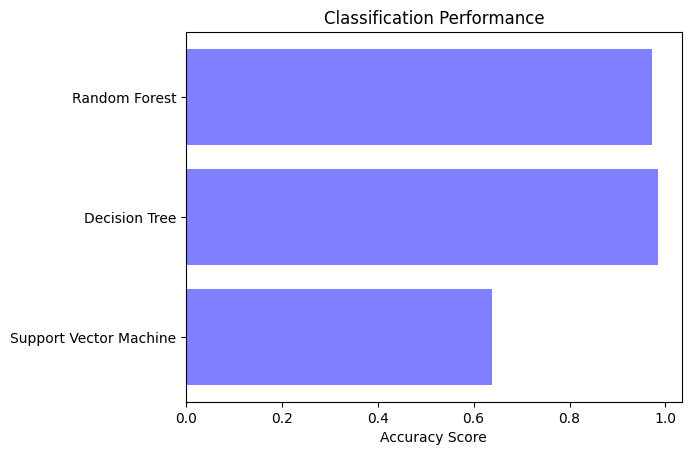

In [28]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

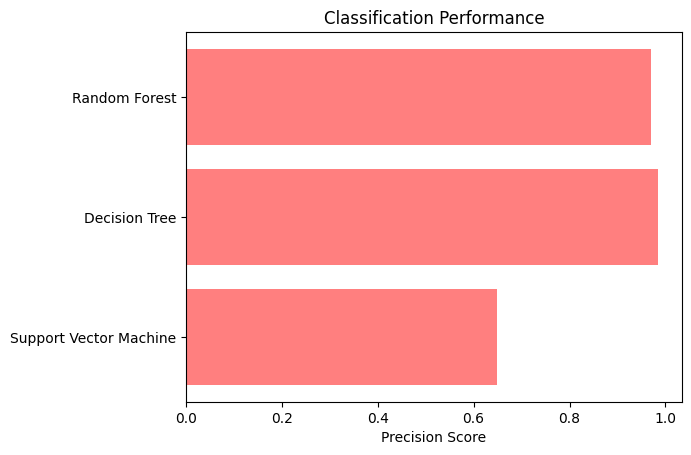

In [29]:
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

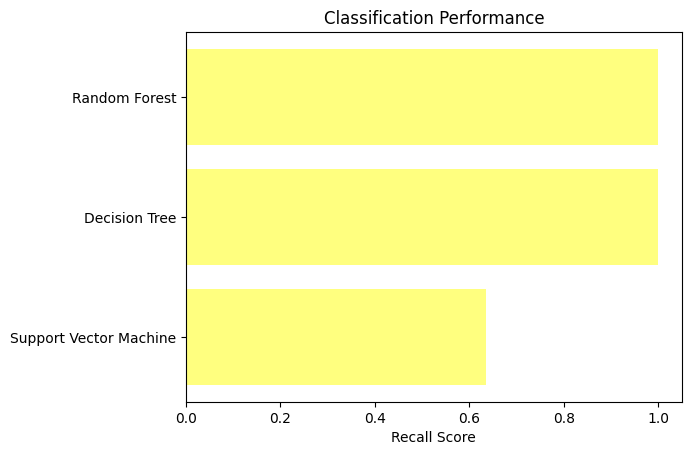

In [30]:
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

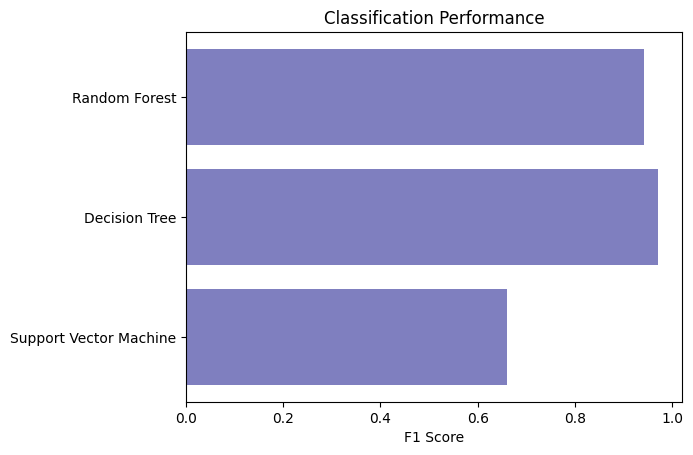

In [31]:
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='navy')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()
